## 1. Loading Data


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [11]:
# you can download the data from here - https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [12]:
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from {file_path}")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: Dataset file not found at {file_path}.")
    print("Please download the 'Telco Customer Churn' dataset (e.g., from Kaggle) and place it in the correct path.")
    df = None

Dataset loaded successfully from WA_Fn-UseC_-Telco-Customer-Churn.csv
Shape: (7043, 21)


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Preprocessing Data


In [14]:
# handling data types, encoding categorical features, and selecting features/target
if df is not None:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df.dropna(subset=['TotalCharges'], inplace=True)

    df.drop('customerID', axis=1, inplace=True)

    label_encoder_churn = LabelEncoder()
    df['Churn'] = label_encoder_churn.fit_transform(df['Churn']) # No=0, Yes=1
    target_names_churn = label_encoder_churn.classes_ # Gets ['No', 'Yes']

    X = df.drop('Churn', axis=1)
    y = df['Churn']

    categorical_cols = X.select_dtypes(include='object').columns

    # applying One-Hot Encoding to categorical features
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

    print("Preprocessing complete.")
    print(f"Shape of features (X) after encoding: {X.shape}")
    # print(X.head())

Preprocessing complete.
Shape of features (X) after encoding: (7032, 30)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                            True              False  ...   
1                           False              False  ...   
2   

## 3. Split Data

In [16]:
if df is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")

Training set size: 4922
Test set size: 2110


## 4. Training the Decision Tree model

In [19]:
if df is not None:
    dt_classifier = DecisionTreeClassifier(random_state=42)

    dt_classifier.fit(X_train, y_train)

## 5. evaluating model

In [20]:
if df is not None:
    y_pred = dt_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names_churn))

Model Accuracy: 0.7047

Confusion Matrix:
[[1216  333]
 [ 290  271]]

Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.79      0.80      1549
         Yes       0.45      0.48      0.47       561

    accuracy                           0.70      2110
   macro avg       0.63      0.63      0.63      2110
weighted avg       0.71      0.70      0.71      2110



## 6. Analyzing

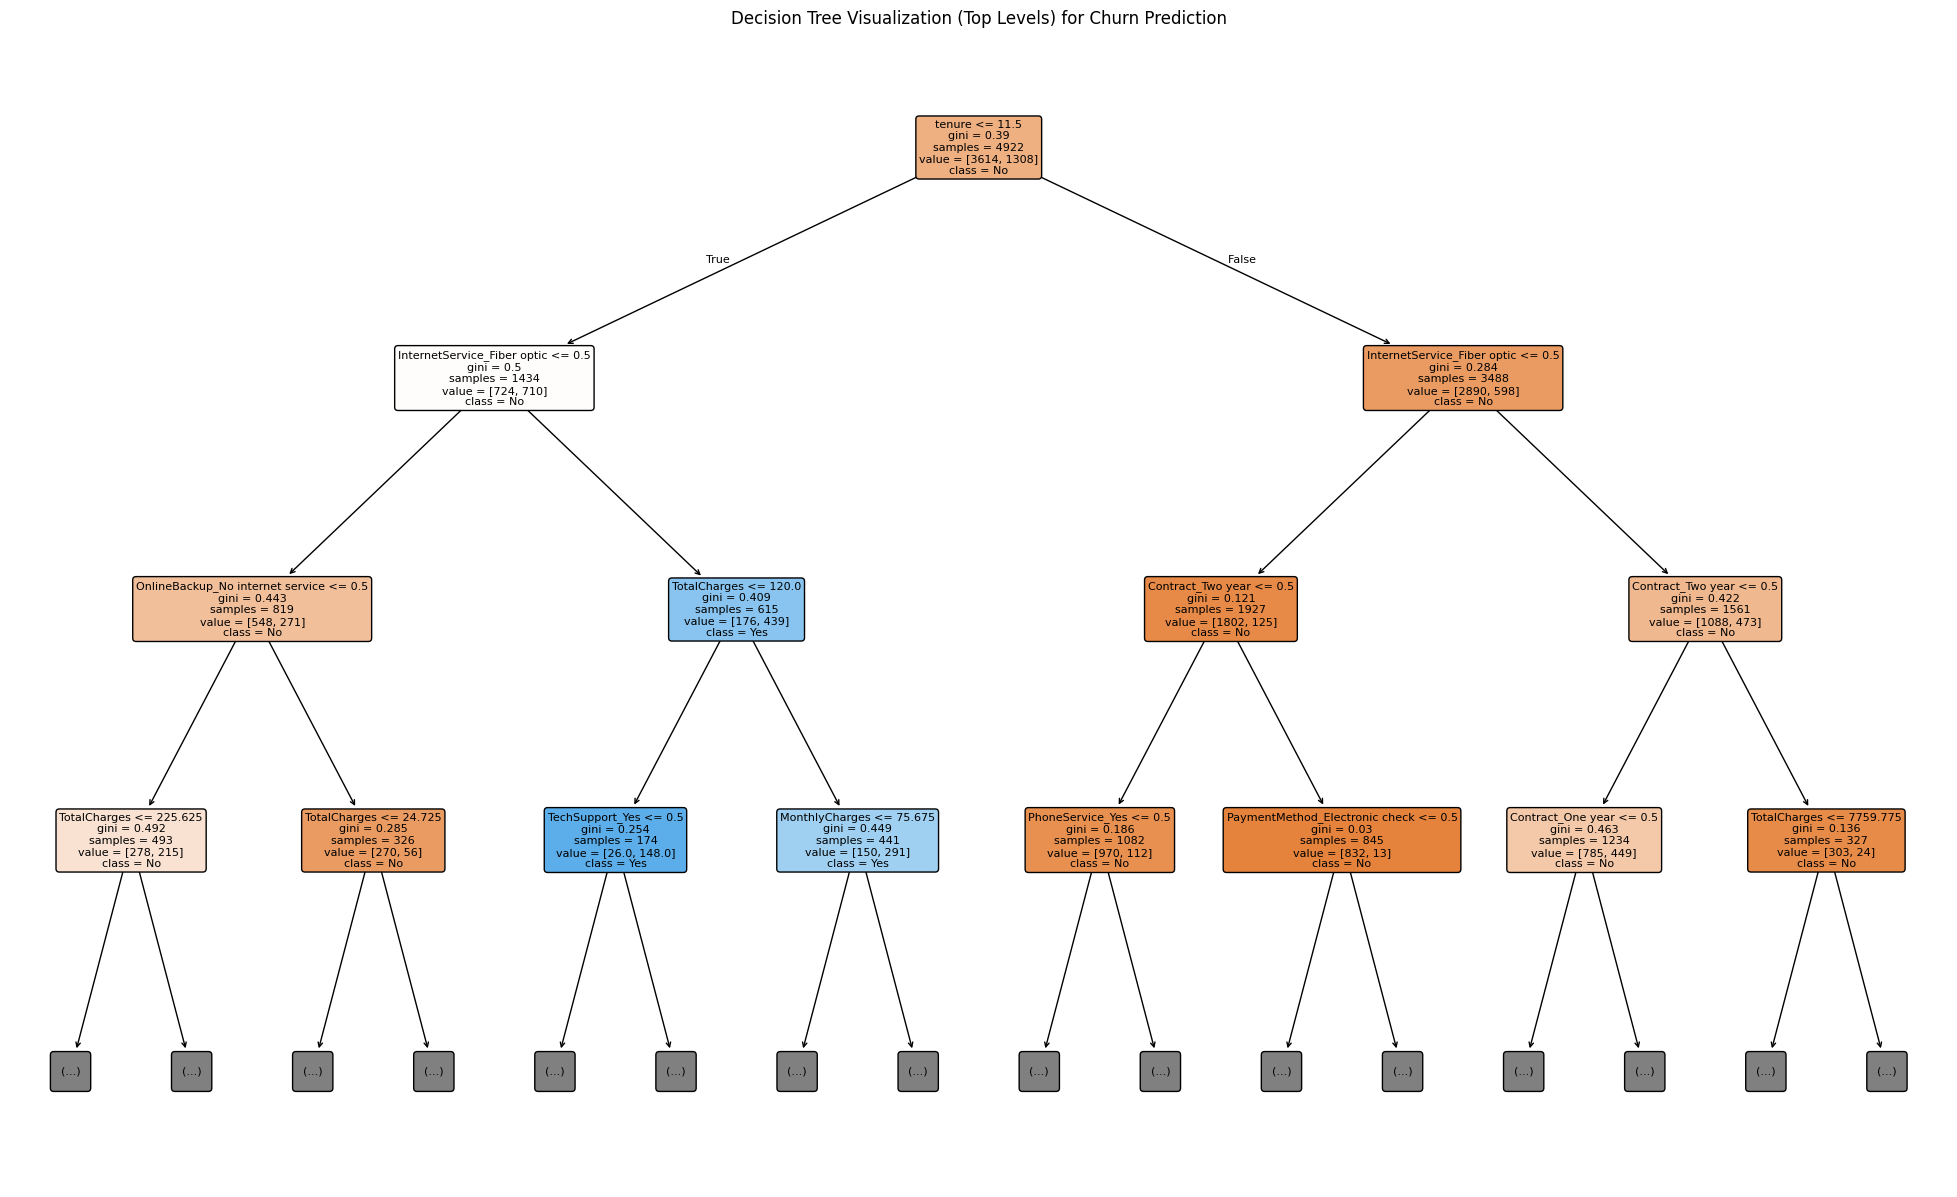


--- Feature Importances ---

Top 15 Features:
                           Feature  Importance
2                   MonthlyCharges    0.204665
3                     TotalCharges    0.194924
1                           tenure    0.182747
10     InternetService_Fiber optic    0.104926
4                      gender_Male    0.030116
25               Contract_Two year    0.026640
6                   Dependents_Yes    0.024968
0                    SeniorCitizen    0.022685
24               Contract_One year    0.018371
13              OnlineSecurity_Yes    0.018265
19                 TechSupport_Yes    0.018012
28  PaymentMethod_Electronic check    0.017821
26            PaperlessBilling_Yes    0.016888
5                      Partner_Yes    0.016060
15                OnlineBackup_Yes    0.015920


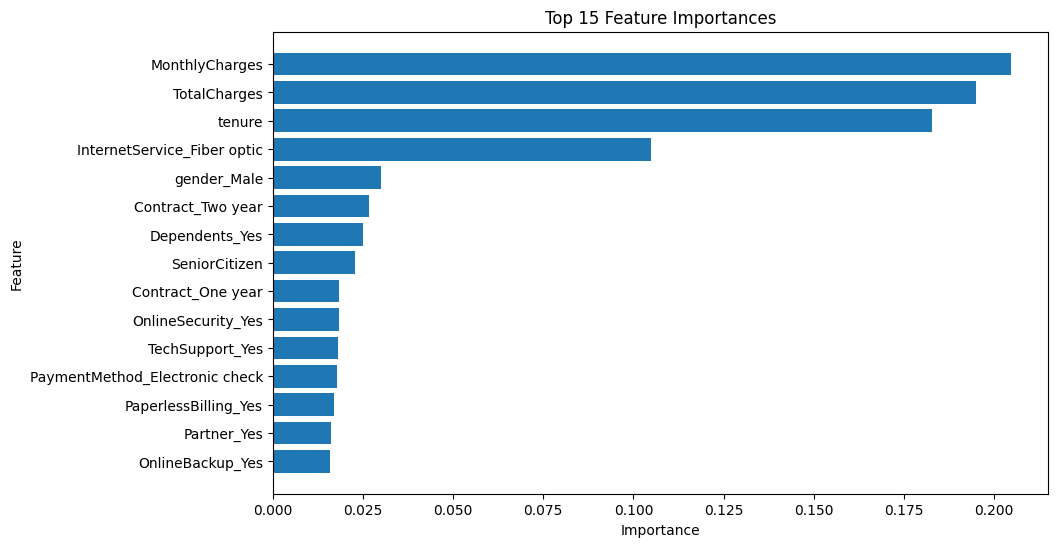

In [23]:
if df is not None:
    # Visualizing the top levels(max_depth=3)
    plt.figure(figsize=(25, 15))
    plot_tree(dt_classifier,
              filled=True,
              rounded=True,
              feature_names=X.columns.tolist(),
              class_names=target_names_churn,
              fontsize=8,
              max_depth=3)
    plt.title("Decision Tree Visualization (Top Levels) for Churn Prediction")
    plt.show()

    print("\n--- Feature Importances ---")
    importances = dt_classifier.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    top_n = 15
    print(f"\nTop {top_n} Features:")
    print(feature_importance_df.head(top_n))

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Top {top_n} Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()


## Summary
The initial Decision Tree model achieved an overall accuracy of 70.5% on the test set.

While the model is reasonably good at identifying customers who won't churn (Recall for 'No' is 79%), its primary weakness is predicting customers who will churn. The recall for 'Yes' (churn) is only 48%, meaning the model misses more than half of the customers who actually end up leaving. Furthermore, when the model does predict churn, it's only correct 45% of the time (Precision for 'Yes'). This is reflected in the confusion matrix, where we correctly identified 271 churners but missed 290.

The model identified MonthlyCharges, TotalCharges, and tenure as the most significant factors influencing its predictions, followed by whether the customer has InternetService_Fiber optic.

In conclusion, while this initial model provides some insight into potential churn drivers, its current predictive power for identifying actual churners is limited and would need significant improvement (perhaps through tuning or different modeling approaches) before being reliably used for targeted retention campaigns.
